In [1]:
import pandas as pd
import numpy as np

import nltk
from konlpy.tag import Twitter
from collections import Counter

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

In [2]:
# 데이터 불러오기
df = pd.read_excel('./data/result_covid_220118_1800.xlsx') 
df.head()

,Title,Date,Article,URL,PressCompany
0,코로나19 백신 중증이상반응 학생에 최대 1000만원 지원,2022.01.18. 오전 11:20,"기사내용 요약내달부터 내년 5월까지…최대 800명 혜택500만원 한도로, 교육급여대...",https://news.naver.com/main/read.naver?mode=LS...,뉴시스
1,국산 코로나19 백신 9부 능선 넘었다…임상 3상 참여자 모집 완료,2022.01.18. 오전 10:31,"코로나19 백신·치료제 TF 회의 한국 , 태국, 필리핀 등 6개국 약 4000여...",https://news.naver.com/main/read.naver?mode=LS...,조선비즈
2,SK바사 코로나19 백신 임상 3상 8부 능선… '오미크론 효능'은,2022.01.18. 오전 11:42,대상자 4037명 모집 완료올 상반기 중 허가 목표초기 대응용… 추가 개발 시급SK...,https://news.naver.com/main/read.naver?mode=LS...,아시아경제신문
3,코로나 집밥에 즉석조리식품 시장 2조 '훌쩍'…해외서도 '인기',2022.01.18. 오후 12:23,"농식품부·aT, 가공식품 세분시장 현황 보고서밀키트 등 가정간편식 인기즉석밥·떡볶이...",https://news.naver.com/main/read.naver?mode=LS...,financial news
4,"코로나 시대, 중고생 희망직업 '컴퓨터공학자·개발자' 뜬다",2022.01.18. 오후 12:00,교육부·직능원 진로교육 현황조사…중 8위·고 4위로 상승중고생 1위는 15년째 교사...,https://news.naver.com/main/read.naver?mode=LS...,뉴스1


In [3]:
articles = df['Article'].tolist()

# 기사 이어 붙이기
articles = ' '.join(articles)

len(articles), articles[:5000]

(50907,
 '기사내용 요약내달부터 내년 5월까지…최대 800명 혜택500만원 한도로, 교육급여대상엔 1천만원  극단선택 고위험군 학생엔 최대 600만원[세종=뉴시스] 강종민 기자 = 유은혜 부총리 겸 교육부 장관이 지난해 12월22일 오후 정부세종청사에서 열린 학생과 함께하는 백신접종 온라인 간담회에서 학생들과 백신접종에 관련된 대화를 나누고 있다. 2022.01.18. ppkjm@newsis.com[세종=뉴시스]김정현 기자 = 교육부가 코로나19 백신 예방접종 이후 중증 이상반응을 겪었으나 국가 보상을 받지 못한 초·중·고 학생에게 의료비를 최대 1000만원까지 지원한다. 많게는 800명까지 혜택을 볼 수 있을 전망이다.유은혜 사회부총리 겸 교육부 장관은 18일 오전 정부세종청사에서 이런 내용의 \'코로나19 극복을 위한 학생 건강회복 지원방안\'을 발표했다.이 방안은 학생과 학부모들이 백신 접종 후 부작용 우려와 함께 이상반응에 대한 보상을 요구해 옴에 따라 마련됐다.  백신을 맞을 당시 만 18세 이하였던 초·중·고 학생으로, 접종 후 90일 이내 중증 이상반응이 발생해 국가 보상을 신청했으나 \'인과성을 인정되기 어려워\' 보상을 받지 못한 경우 지원 대상이 된다. 이상반응을 겪었다면 먼저 질병관리청에 국가보상 신청을 접수하고 절차를 밟아야 한다. 이후 예방접종 피해보상전문위원회 심의 결과 보상에서 제외됨을 통보 받으면 교육부 지원을 신청할 수 있다. 단, 보상 제외 사유가 \'명확히 인과성이 없는 경우\'는 지원하지 않는다. \'인과성이 인정되기 어려운\' 이상반응 중 \'백신보다는 다른 이유에 의한 가능성이 더 높은 경우\'에 한정해 교육부가 지원하는 개념이다.인과성이 인정되기 어렵지만 \'백신과 이상반응에 대한 자료가 충분하지 않은\' ▲심근염 ▲심낭염 ▲길랑-바레증후군 ▲면역혈소판 감소증 ▲급성파종성뇌척수염 ▲모세혈관누출증후군 ▲혈소판감소성이 없는 뇌정맥등 혈전 등 이상반응은 질병청이 의료비를 지원한다.이같은 사유로 국가보상 제외 통보를 안

In [4]:
# norm == 정규화(normalization)
# stem == 어근화(stemming)

twitter = Twitter()
raw_pos_tagged = twitter.pos(articles, norm=True, stem=True) # POS Tagging
raw_pos_tagged

C:\ProgramData\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[('기사', 'Noun'),
 ('내용', 'Noun'),
 ('요', 'Modifier'),
 ('약', 'Modifier'),
 ('내달', 'Noun'),
 ('부터', 'Josa'),
 ('내년', 'Noun'),
 ('5월', 'Number'),
 ('까지', 'Foreign'),
 ('…', 'Punctuation'),
 ('최대', 'Noun'),
 ('800', 'Number'),
 ('명', 'Noun'),
 ('혜택', 'Noun'),
 ('500만원', 'Number'),
 ('한도', 'Noun'),
 ('로', 'Josa'),
 (',', 'Punctuation'),
 ('교육', 'Noun'),
 ('급', 'Suffix'),
 ('여', 'Josa'),
 ('대상', 'Noun'),
 ('엔', 'Josa'),
 ('1천만원', 'Number'),
 ('극단', 'Noun'),
 ('선택', 'Noun'),
 ('고', 'Modifier'),
 ('위험', 'Noun'),
 ('군', 'Suffix'),
 ('학생', 'Noun'),
 ('엔', 'Josa'),
 ('최대', 'Noun'),
 ('600만원', 'Number'),
 ('[', 'Punctuation'),
 ('세종', 'Noun'),
 ('=', 'Punctuation'),
 ('뉴시스', 'Noun'),
 (']', 'Punctuation'),
 ('강종민', 'Noun'),
 ('기자', 'Noun'),
 ('=', 'Punctuation'),
 ('유은혜', 'Noun'),
 ('부총리', 'Noun'),
 ('겸', 'Noun'),
 ('교육부', 'Noun'),
 ('장관', 'Noun'),
 ('이', 'Josa'),
 ('지난해', 'Noun'),
 ('12월', 'Number'),
 ('22일', 'Number'),
 ('오후', 'Noun'),
 ('정부', 'Noun'),
 ('세종', 'Noun'),
 ('청사', 'Noun'),
 ('에서', 

In [5]:
# 제외하고자 하는 단어 리스트
del_list = ['하다', '있다', '없다', '되다', '이다', '돼다', '않다', '그렇다', '맞다', '아니다', '이렇다', '어떻다'
           , '들어가다', '드러나다', '연합뉴스', '기자', '뉴스', '대해', '관련', '가다', '보다', '사진', '아스', '진자']

In [6]:
# 조사, 어미, 구두점을 제외한 나머지 단어들을 모두 word_cleaned 리스트에 담습니다.
# 이 때에는 여러번 나온 단어들도 복수 허용되어 여러번 리스트에 담기게 됩니다.
word_cleaned = []

for word in raw_pos_tagged: # ('서울', 'Noun'),
    
    if word[1] not in ["Josa", "Eomi", "Punctuation", "Foreign", "Number"]:
    # Foreign == ”, “ 와 같이 제외되어야 할 항목 (조사, 어미, 구두점)
        
        if (len(word[0]) != 1) and (word[0] not in del_list): 
        # 한 글자로 이뤄진 단어들을 제외, 원치 않는 단어들을 제외            
            word_cleaned.append(word[0])
            # append를 통한 빈 리스트에 추가
        
word_cleaned

['기사',
 '내용',
 '내달',
 '내년',
 '최대',
 '혜택',
 '한도',
 '교육',
 '대상',
 '극단',
 '선택',
 '위험',
 '학생',
 '최대',
 '세종',
 '뉴시스',
 '강종민',
 '유은혜',
 '부총리',
 '교육부',
 '장관',
 '지난해',
 '오후',
 '정부',
 '세종',
 '청사',
 '열리다',
 '학생',
 '함께',
 '백신',
 '접종',
 '온라인',
 '간담',
 '학생',
 '접종',
 '대화',
 '나누다',
 'ppkjm@newsis.com',
 '세종',
 '뉴시스',
 '김정현',
 '교육부',
 '코로나',
 '백신',
 '예방접종',
 '이후',
 '중증',
 '이상',
 '반응',
 '겪다',
 '국가',
 '보상',
 '받다',
 '학생',
 '의료',
 '최대',
 '지원',
 '많다',
 '혜택',
 '전망',
 '유은혜',
 '사회',
 '부총리',
 '교육부',
 '장관',
 '오전',
 '정부',
 '세종',
 '청사',
 '내용',
 '코로나',
 '극복',
 '학생',
 '건강',
 '회복',
 '지원',
 '방안',
 '발표',
 '방안',
 '학생',
 '학부모',
 '백신',
 '접종',
 '부작용',
 '우려',
 '함께',
 '이상',
 '반응',
 '대한',
 '보상',
 '요구',
 '따르다',
 '마련',
 '백신',
 '당시',
 '학생',
 '접종',
 '이내',
 '중증',
 '이상',
 '반응',
 '발생',
 '국가',
 '보상',
 '신청',
 '인과성',
 '인정',
 '어렵다',
 '보상',
 '받다',
 '경우',
 '지원',
 '대상',
 '이상',
 '반응',
 '겪다',
 '먼저',
 '질병',
 '관리',
 '국가',
 '보상',
 '신청',
 '접수',
 '절차',
 '밟다',
 '이후',
 '예방접종',
 '피해',
 '보상',
 '전문',
 '위원회',
 '심의',
 '결과',
 '보상',
 '제외',
 '통보',
 '받다',


In [7]:
# Counter 함수를 사용하여 word_cleaned 안의 리스트와 갯수를와 갯수를 딕셔너리화 함
result = Counter(word_cleaned)
word_dic = dict(result)

word_dic

{'기사': 6,
 '내용': 14,
 '내달': 4,
 '내년': 9,
 '최대': 15,
 '혜택': 2,
 '한도': 10,
 '교육': 10,
 '대상': 25,
 '극단': 3,
 '선택': 3,
 '위험': 35,
 '학생': 47,
 '세종': 13,
 '뉴시스': 20,
 '강종민': 1,
 '유은혜': 3,
 '부총리': 5,
 '교육부': 25,
 '장관': 12,
 '지난해': 57,
 '오후': 10,
 '정부': 43,
 '청사': 5,
 '열리다': 11,
 '함께': 12,
 '백신': 105,
 '접종': 72,
 '온라인': 18,
 '간담': 3,
 '대화': 4,
 '나누다': 3,
 'ppkjm@newsis.com': 2,
 '김정현': 2,
 '코로나': 190,
 '예방접종': 19,
 '이후': 26,
 '중증': 16,
 '이상': 58,
 '반응': 31,
 '겪다': 7,
 '국가': 27,
 '보상': 33,
 '받다': 39,
 '의료': 26,
 '지원': 61,
 '많다': 10,
 '전망': 7,
 '사회': 27,
 '오전': 16,
 '극복': 8,
 '건강': 18,
 '회복': 20,
 '방안': 10,
 '발표': 12,
 '학부모': 7,
 '부작용': 5,
 '우려': 6,
 '대한': 33,
 '요구': 6,
 '따르다': 57,
 '마련': 6,
 '당시': 6,
 '이내': 1,
 '발생': 22,
 '신청': 22,
 '인과성': 6,
 '인정': 7,
 '어렵다': 9,
 '경우': 14,
 '먼저': 3,
 '질병': 17,
 '관리': 28,
 '접수': 3,
 '절차': 5,
 '밟다': 1,
 '피해': 19,
 '전문': 2,
 '위원회': 8,
 '심의': 8,
 '결과': 21,
 '제외': 7,
 '통보': 4,
 '사유': 5,
 '명확하다': 1,
 '늘다': 33,
 '다른': 9,
 '이유': 6,
 '의하다': 2,
 '가능성': 13,
 '높다': 24,
 '

In [8]:
# 딕셔너리를 튜플로 만든 후 lambda 함수를 사용해 내림차순 정렬
sorted_word_dic = sorted(word_dic.items(), key=lambda x:x[1], reverse=True)

sorted_word_dic

[('코로나', 190),
 ('백신', 105),
 ('접종', 72),
 ('지원', 61),
 ('이상', 58),
 ('오미크론', 58),
 ('지난해', 57),
 ('따르다', 57),
 ('밝히다', 53),
 ('방역', 52),
 ('학생', 47),
 ('증가', 45),
 ('정부', 43),
 ('치료', 43),
 ('받다', 39),
 ('감염', 37),
 ('위험', 35),
 ('국내', 35),
 ('개발', 34),
 ('보상', 33),
 ('대한', 33),
 ('늘다', 33),
 ('진행', 33),
 ('환자', 33),
 ('반응', 31),
 ('지역', 31),
 ('감소', 30),
 ('입원', 30),
 ('수도권', 30),
 ('서울', 29),
 ('국민', 29),
 ('공단', 29),
 ('관리', 28),
 ('평가', 28),
 ('국가', 27),
 ('사회', 27),
 ('기준', 27),
 ('해외', 27),
 ('이후', 26),
 ('의료', 26),
 ('같다', 26),
 ('단계', 26),
 ('바이러스', 26),
 ('신규', 26),
 ('대상', 25),
 ('교육부', 25),
 ('위해', 25),
 ('수출', 25),
 ('나타나다', 25),
 ('높다', 24),
 ('SK', 24),
 ('바이오', 24),
 ('대비', 24),
 ('보이다', 24),
 ('평균', 23),
 ('검사', 23),
 ('발생', 22),
 ('신청', 22),
 ('추가', 22),
 ('통해', 22),
 ('모유', 22),
 ('결과', 21),
 ('사이언스', 21),
 ('뉴시스', 20),
 ('회복', 20),
 ('확산', 20),
 ('분석', 20),
 ('설명', 20),
 ('지난', 20),
 ('예방접종', 19),
 ('피해', 19),
 ('운영', 19),
 ('계획', 19),
 ('최근', 19),
 ('영국', 19),
 ('매

### '코로나'에 대한 기사 내 단어 빈도수 시각화 _ 막대그래프

In [9]:
# 폰트 설정
%matplotlib inline
font_name = matplotlib.font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name() # NanumGothic.otf
matplotlib.rc('font', family=font_name)

In [10]:
# 막대그래프 시각화는 NLTK 라이브러리만으로 진행하기 어려우므로,
# NLTK의 FreqDist 함수를 적용한 후 Pandas의 Dataframe에 데이터를 담은 다음 시각화를 진행
word_frequency = nltk.FreqDist(word_cleaned) # Frequency Distribution

word_frequency

FreqDist({'코로나': 190, '백신': 105, '접종': 72, '지원': 61, '이상': 58, '오미크론': 58, '지난해': 57, '따르다': 57, '밝히다': 53, '방역': 52, ...})

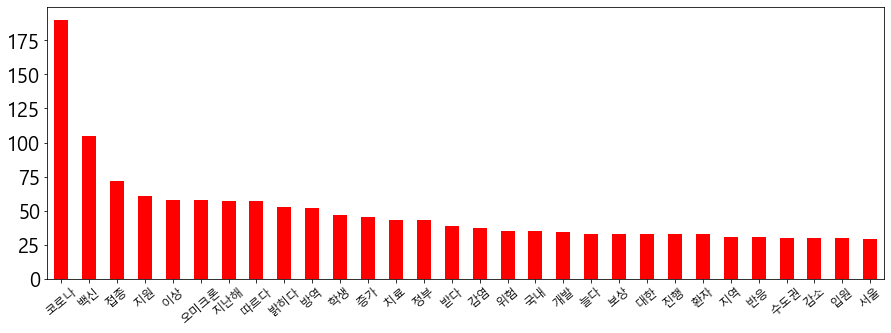

In [11]:
# 단어 빈도가 담긴 Dict 로부터 값을 가져와 DataFrame 을 만듭니다.
df = pd.DataFrame(list(word_frequency.values()), word_frequency.keys()) 

# 내림차순 정렬
result = df.sort_values([0], ascending=False)

# 상위 30개
result = result[:30]

# 막대 그래프
result.plot(kind='bar', legend=False, figsize=(15,5), color='r') # 'bar' graph
plt.xticks(fontsize =12, rotation=40)
plt.yticks(fontsize =20)
plt.savefig('./image/covid_bargraph.png')
plt.show()

### '코로나'에 대한 기사 내 단어 빈도수 시각화 _ word cloud

In [12]:
# masking을 위한 vaccine.png 불러오기
vaccine_coloring = np.array(Image.open('./image/covid-19.png'))
image_colors = ImageColorGenerator(vaccine_coloring)
word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf",
                       width=2000, height=1000,
                       mask=vaccine_coloring,
                       max_words=10000,
                       prefer_horizontal= 1.0,
                       background_color='white').generate_from_frequencies(word_dic)

In [13]:
word_cloud.generate_from_frequencies(word_dic) # Generate wordcloud from word "frequency" data.

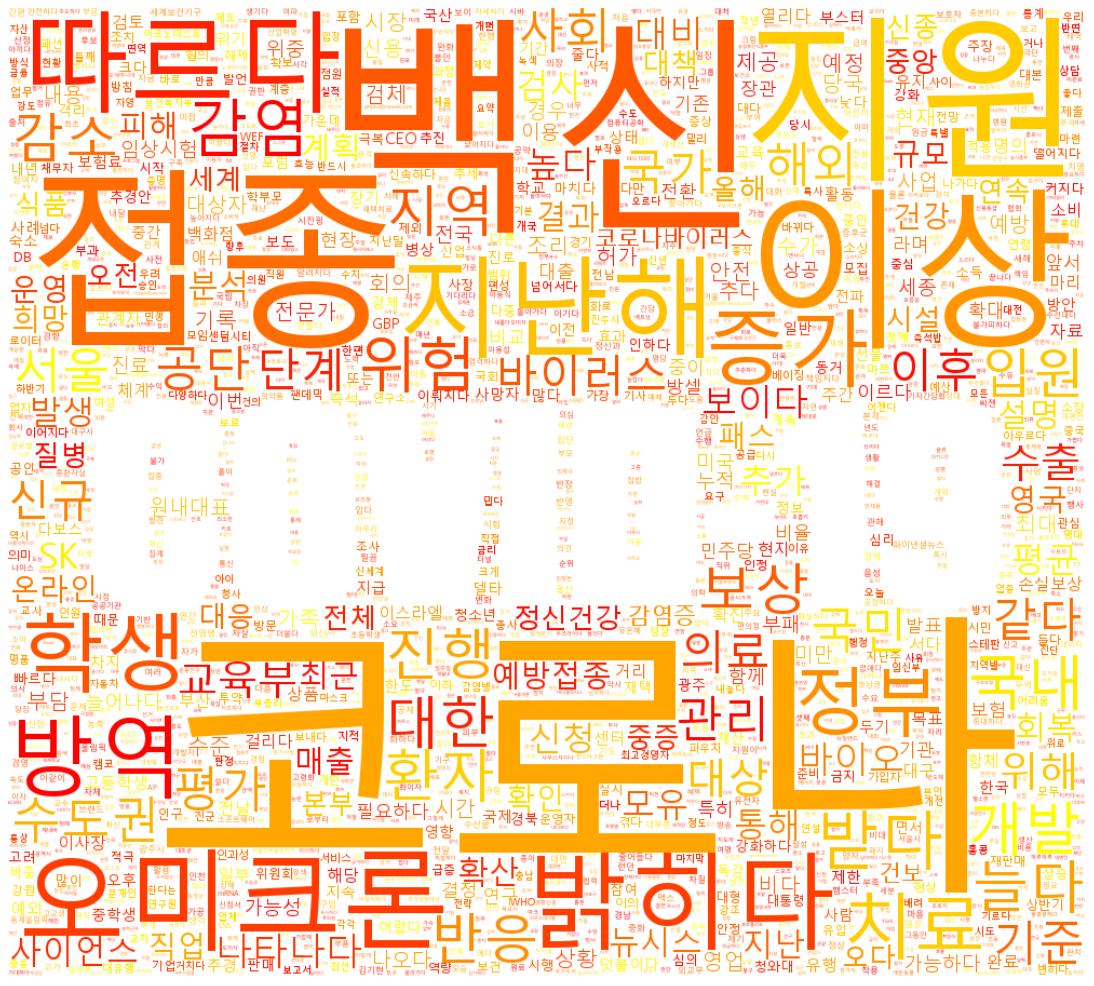

In [14]:
plt.figure(figsize=(15,15))
plt.imshow(word_cloud.recolor(colormap='autumn'), interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [15]:
word_cloud.to_file("./image/covid_wordcloud.png")